In [7]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
def simulacao_monty_hall(num_simulacoes):
    # Contador para vitórias ao trocar e para vitórias sem trocar
    acerto_alterado = 0  
    acerto_mantido = 0

    for i in range(num_simulacoes):
        # Definir onde está o prêmio (aleatoriamente entre as portas 1, 2 e 3)
        premio = random.randint(1, 3)
        
        # Jogador escolhe uma porta aleatoriamente
        escolha = random.randint(1, 3)
        
        # Apresentador abre uma das portas com uma "cabra"
        # Escolhe qualquer porta que não tenha o prêmio e não seja a escolha do jogador
        portas = [1, 2, 3]
        portas.remove(escolha)
        if premio in portas:
            portas.remove(premio)
        porta_aberta = random.choice(portas)
        
        # Simular as duas estratégias: trocar ou ficar
        # Se o jogador trocar, ele escolhe a outra porta restante
        porta_restante = [porta for porta in [1, 2, 3] if porta != escolha and porta != porta_aberta][0]
        
        # Verificar se a troca ou a permanência resulta em vitória
        if porta_restante == premio:
            acerto_alterado += 1
        if escolha == premio:
            acerto_mantido += 1

    # Calcular as probabilidades
    prob_ganhar_alterado = acerto_alterado / num_simulacoes
    prob_ganhar_mantido = acerto_mantido / num_simulacoes
    razao = prob_ganhar_alterado / prob_ganhar_mantido

    return prob_ganhar_alterado, prob_ganhar_mantido, razao

# Número de simulações
num_simulacoes = 100000
prob_ganhar_alterado, prob_ganhar_mantido, razao = simulacao_monty_hall(num_simulacoes)

print(f"Após {num_simulacoes} simulações:")
print(f"Probabilidade de ganhar trocando de porta: {prob_ganhar_alterado:.4f}")
print(f"Probabilidade de ganhar mantendo a porta: {prob_ganhar_mantido:.4f}")
print(f"Razão entre as probabilidades (trocar / manter): {razao:.4f}")

Após 100000 simulações:
Probabilidade de ganhar trocando de porta: 0.6680
Probabilidade de ganhar mantendo a porta: 0.3320
Razão entre as probabilidades (trocar / manter): 2.0120


In [13]:
lista_razao = []
for num_simulacoes in range(10,1000):
    prob_ganhar_alterado, prob_ganhar_mantido, razao = simulacao_monty_hall(num_simulacoes)
    lista_razao.append(razao)

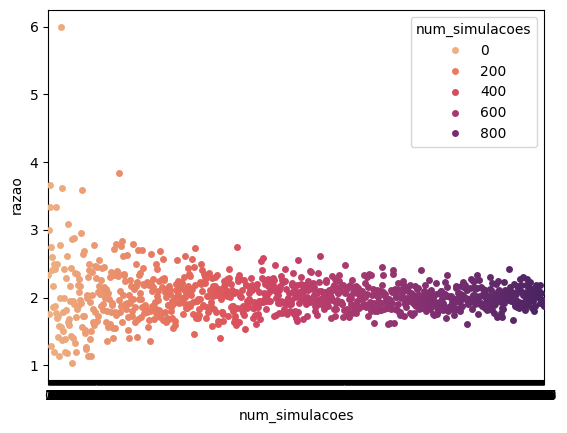

In [21]:
df = pd.DataFrame(lista_razao, columns=["razao"])
df["num_simulacoes"] = df.index
sns.swarmplot(x="num_simulacoes", y="razao", hue="num_simulacoes", palette="flare", data=df)

plt.show()

c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


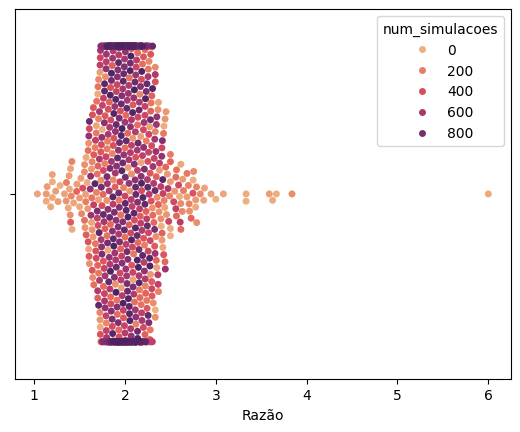

In [17]:
sns.swarmplot(x="Razão", hue = "num_simulacoes", palette = 'flare', data=df)

plt.show()